In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, pearsonr

# Configurations

In [15]:
model_colors = ['#1f77b4','#aec7e8', '#ff7f0e','#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', 
                '#9467bd','#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f' ]
pd.set_option('display.max_columns', None)

# Data

In [16]:
inference_data = pd.read_csv('inference_rankings.csv')
inference_data

,model_id,file_id,frame_id,entropy,bald
0,1,43110,1306864,45426.684,3010.1190
1,1,58297,1801769,68447.484,3511.7153
2,1,88716,2675442,75814.490,4004.3613
3,1,115225,3494481,49940.410,3520.0146
4,1,101758,3079447,37097.990,2846.6863
...,...,...,...,...,...
1445815,15,140691,4250494,96113.620,11666.8125
1445816,15,4842,115032,37118.324,4503.8247
1445817,15,6931,181637,73759.690,14121.3890
1445818,15,29947,929891,57336.492,3780.4520


In [17]:
expert_agreement = pd.read_csv('expert_annotations_agreement.csv') 
expert_agreement 

,file_id,frame_id,randolphs_kappa
0,295,6941,0.974
1,295,6942,0.975
2,295,6943,0.976
3,295,6944,0.974
4,295,6945,0.971
...,...,...,...
1057,44490,1348119,0.850
1058,44490,1348120,0.845
1059,44490,1348121,0.852
1060,44490,1348122,0.853


In [18]:
expert_evaluations = pd.read_csv('expert_annotations_evaluation.csv')
expert_evaluations

,model_id,file_id,frame_id,bald,entropy,dice
0,1,295,6941,369.58408,10673.325,0.995066
1,1,295,6942,303.78146,10597.938,0.995791
2,1,295,6943,273.83664,9962.284,0.995576
3,1,295,6944,325.22446,10589.146,0.995794
4,1,295,6945,306.81964,10403.935,0.996334
...,...,...,...,...,...,...
15925,15,44490,1348119,2148.82710,48580.640,0.996950
15926,15,44490,1348120,1518.40230,43783.426,0.997125
15927,15,44490,1348121,1879.42100,47425.773,0.995630
15928,15,44490,1348122,1581.20280,46753.062,0.997556


## Stats

In [19]:
expert_agreement['randolphs_kappa'].describe().round(2)

count    1062.00
mean        0.91
std         0.10
min         0.61
25%         0.85
50%         0.96
75%         0.97
max         1.00
Name: randolphs_kappa, dtype: float64

In [20]:
expert_evaluations[['bald', 'entropy', 'dice']].describe().round(2)

,bald,entropy,dice
count,15930.00,15930.00,15930.00
mean,4556.43,41427.13,0.98
std,5415.04,25130.04,0.02
min,60.35,1091.11,0.86
25%,1050.98,21343.77,0.98
50%,2662.47,34439.26,0.99
75%,5937.67,56246.40,1.00
max,47765.18,142988.06,1.00


In [21]:
expert_evaluations.groupby('model_id')[['bald', 'entropy', 'dice']].describe().round(2)

bald                                                          \
           count      mean      std     min      25%       50%       75%   
model_id                                                                   
1         1062.0   3775.81  2757.77  217.12  1729.73   3239.67   4907.79   
2         1062.0   2005.65  2204.07  115.12   331.52   1217.18   2816.05   
3         1062.0   2458.47  2519.97  161.53   391.54   1575.22   3905.21   
4         1062.0   1893.57   803.51  582.08  1238.70   1782.65   2341.35   
5         1062.0   1450.89  1482.31   65.27   375.94    896.97   1994.57   
6         1062.0   4048.29  3853.38   60.35   811.73   2714.44   6612.50   
7         1062.0   2221.07  2390.57  191.04   503.17   1132.03   3163.18   
8         1062.0   3767.00  4384.31  170.44   567.62   1947.78   5505.34   
9         1062.0   3859.74  4429.20  166.35   726.13   2068.99   5545.58   
10        1062.0  12923.83  8367.70  273.17  5975.67  12088.78  18495.49   
11        1062.0  10642.64  7041.23  175.44  5568.14   9004.97  13768.20   
12        1062.0   2958.18  2897.14  238.51   783.21   1834.50   4380.12   
13        1062.0   7615.59  7353.89  211.40  3525.49   5539.79   8709.89   
14        1062.0   5110.25  3857.26  212.84  2051.97   4182.61   7301.36   
15        1062.0   3615.44  2615.13  479.55  1972.84   2958.43   4504.24   

                   entropy                                                    \
               max   count      mean       std       min       25%       50%   
model_id                                                                       
1         17592.33  1062.0  48232.56  24050.85   9638.54  29000.75  46553.06   
2         13769.82  1062.0  20837.50   9101.01   4335.64  12997.53  18521.78   
3         14627.06  1062.0  29528.15  17491.61   8861.63  15001.13  22063.06   
4          6083.78  1062.0  62162.90  32670.45  16642.45  33109.86  56301.58   
5         10104.12  1062.0  36964.54  21616.43   2367.68  17973.34  30526.34   
6         20139.38  1062.0  23771.63  11202.44   1091.11  13571.00  21579.39   
7         13081.51  1062.0  33798.96  21765.49   9222.06  16018.97  26702.83   
8         27020.61  1062.0  31554.44  14712.07   3847.65  19595.38  26461.40   
9         25771.79  1062.0  32041.63  13439.92   6488.91  21945.02  28040.90   
10        47765.18  1062.0  48105.09  22897.41  10360.04  26885.52  47988.42   
11        40873.64  1062.0  46152.53  21252.37  10836.67  29421.32  41790.12   
12        19187.09  1062.0  46512.70  24800.08  13213.83  26102.37  41802.66   
13        46487.27  1062.0  55883.44  25773.10  13985.25  37097.19  51501.78   
14        22844.25  1062.0  49088.83  25995.31   6280.36  28612.74  44622.61   
15        18522.46  1062.0  56771.98  28926.39  15601.97  32715.90  53366.61   

                                 dice                                           
               75%        max   count  mean   std   min   25%   50%   75%  max  
model_id                                                                        
1         63563.69  122704.25  1062.0  0.98  0.02  0.91  0.97  0.99  0.99  1.0  
2         27288.71   51146.17  1062.0  0.99  0.01  0.92  0.98  0.99  1.00  1.0  
3         43332.45   78097.92  1062.0  0.98  0.02  0.89  0.98  0.99  1.00  1.0  
4         88733.46  142988.06  1062.0  0.99  0.01  0.92  0.98  0.99  1.00  1.0  
5         55072.32   86855.42  1062.0  0.99  0.01  0.92  0.98  0.99  1.00  1.0  
6         30992.66   64873.26  1062.0  0.99  0.01  0.92  0.98  0.99  0.99  1.0  
7         44000.26  128614.19  1062.0  0.99  0.01  0.92  0.98  0.99  1.00  1.0  
8         41012.12   87168.67  1062.0  0.99  0.02  0.88  0.98  0.99  1.00  1.0  
9         40110.44   79940.09  1062.0  0.98  0.02  0.86  0.98  0.99  1.00  1.0  
10        64894.29  111417.86  1062.0  0.98  0.02  0.88  0.97  0.98  0.99  1.0  
11        62611.28  104467.67  1062.0  0.98  0.02  0.90  0.97  0.99  0.99  1.0  
12        68909.73  103943.09  1062.0  0.99  0.01  0.93  0.98  0.99 

In [22]:
inference_data[['model_id','entropy', 'bald']].groupby('model_id').describe()

entropy                                                        \
            count          mean           std          min          25%   
model_id                                                                  
1         96392.0  54612.057552  24080.485451  1537.182300  37239.72700   
2         96391.0  27875.648338  15587.528959     0.015713  16184.65900   
3         96390.0  37524.104320  18712.479411     5.889223  22611.26025   
4         96390.0  85111.302690  27132.878640     1.374943  67496.63750   
5         96387.0  47750.816739  22804.497648     0.230473  30431.00000   
6         96387.0  35457.497073  17467.557748    15.210969  22412.06550   
7         96387.0  63811.968189  27758.411267     1.374924  42972.01750   
8         96387.0  43866.076540  23435.496303     1.961573  23972.13750   
9         96387.0  39528.594382  22745.092700     0.195496  19836.79500   
10        96387.0  46424.742449  24113.678926     1.460565  26431.00000   
11        96387.0  55037.373409  23731.363618     0.413328  37325.14650   
12        96387.0  66172.576066  24529.451555    29.270080  49415.60950   
13        96387.0  57244.894835  23003.599953     1.917327  40551.81000   
14        96387.0  50241.454506  27230.038050     1.094615  26287.52750   
15        96387.0  55464.539926  26970.947543     0.281109  32854.61000   

                                                  bald                \
                 50%          75%         max    count          mean   
model_id                                                               
1         52290.9700   68940.6125  281010.600  96392.0   6021.137503   
2         25975.1820   37575.3105  108437.086  96391.0   7709.356569   
3         37605.4645   50791.6215  131325.860  96390.0   8693.861290   
4         85968.5850  103104.2110  217190.080  96390.0   5668.658922   
5         48328.4200   63372.3940  157959.810  96387.0   5390.701451   
6         33701.9570   46663.3065  137631.270  96387.0  15063.013405   
7         61994.0620   82343.7400  171934.920  96387.0  11229.687760   
8         42045.7150   61083.4725  157643.580  96387.0  14417.216611   
9         39084.0080   56477.3100  139769.800  96387.0  14689.416725   
10        45387.1840   63045.6820  170494.480  96387.0  18930.933584   
11        54940.1560   71291.6550  176863.600  96387.0  18404.277720   
12        65153.5900   81589.3075  234306.600  96387.0   9151.246454   
13        56484.1200   72659.6550  159742.780  96387.0  10465.181668   
14        50928.6370   70882.1850  158917.170  96387.0  11279.993669   
15        55454.9770   75721.4900  185134.020  96387.0   5325.766363   

                                                                           \
                   std        min           25%         50%           75%   
model_id                                                                    
1          3830.834961  96.311850   3178.517075   5250.7654   8000.994150   
2          5962.738708   0.001481   2871.643900   6238.4497  11334.762000   
3          5573.394104   0.677758   3990.125750   8226.9500  12618.522250   
4          2664.939128   0.223009   3909.019900   4991.2024   6611.607375   
5          3285.958620   0.043924   2759.115250   5016.7990   7491.295200   
6          9902.551180   1.797059   7199.633200  13655.8440  21280.951000   
7          6223.012377   0.196212   6379.742200  11095.0630  15453.697000   
8         10306.211246   0.169323   6112.996600  12517.5880  20714.175500   
9         10473.764573   0.023726   5739.468200  13033.7770  21879.584500   
10        12030.628020   0.063141   9116.343500  17266.9530  26527.978500   
11        10221.821992   0.018106  10799.718000  17041.8100  24316.943000   
12         5020.519841   1.419831   5446.644850   8658.7180  12117.517000   
13         6157.169230   0.073614   6102.665000   9324.4800  13484.821500   
14         7804.646469   0.058899   4707.874150  10046.8220  16410.776500   
15         3412.399460   0.022985   2531.190550   478

# Figures - Main 

## Figure 3 - Uncertainty and disagreement distributions

/var/folders/3f/_vnd99d53wj_7lpt3bxd1kvw0000gn/T/ipykernel_75256/2644859318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(inference_data, x="model_id", y="entropy",inner="quart", fill = True, ax = ax1, palette=model_colors, orient='x', split=False,
/var/folders/3f/_vnd99d53wj_7lpt3bxd1kvw0000gn/T/ipykernel_75256/2644859318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(inference_data, x="model_id", y="bald", inner="quart", fill = True, ax = ax2, palette=model_colors, orient='x', split=False,


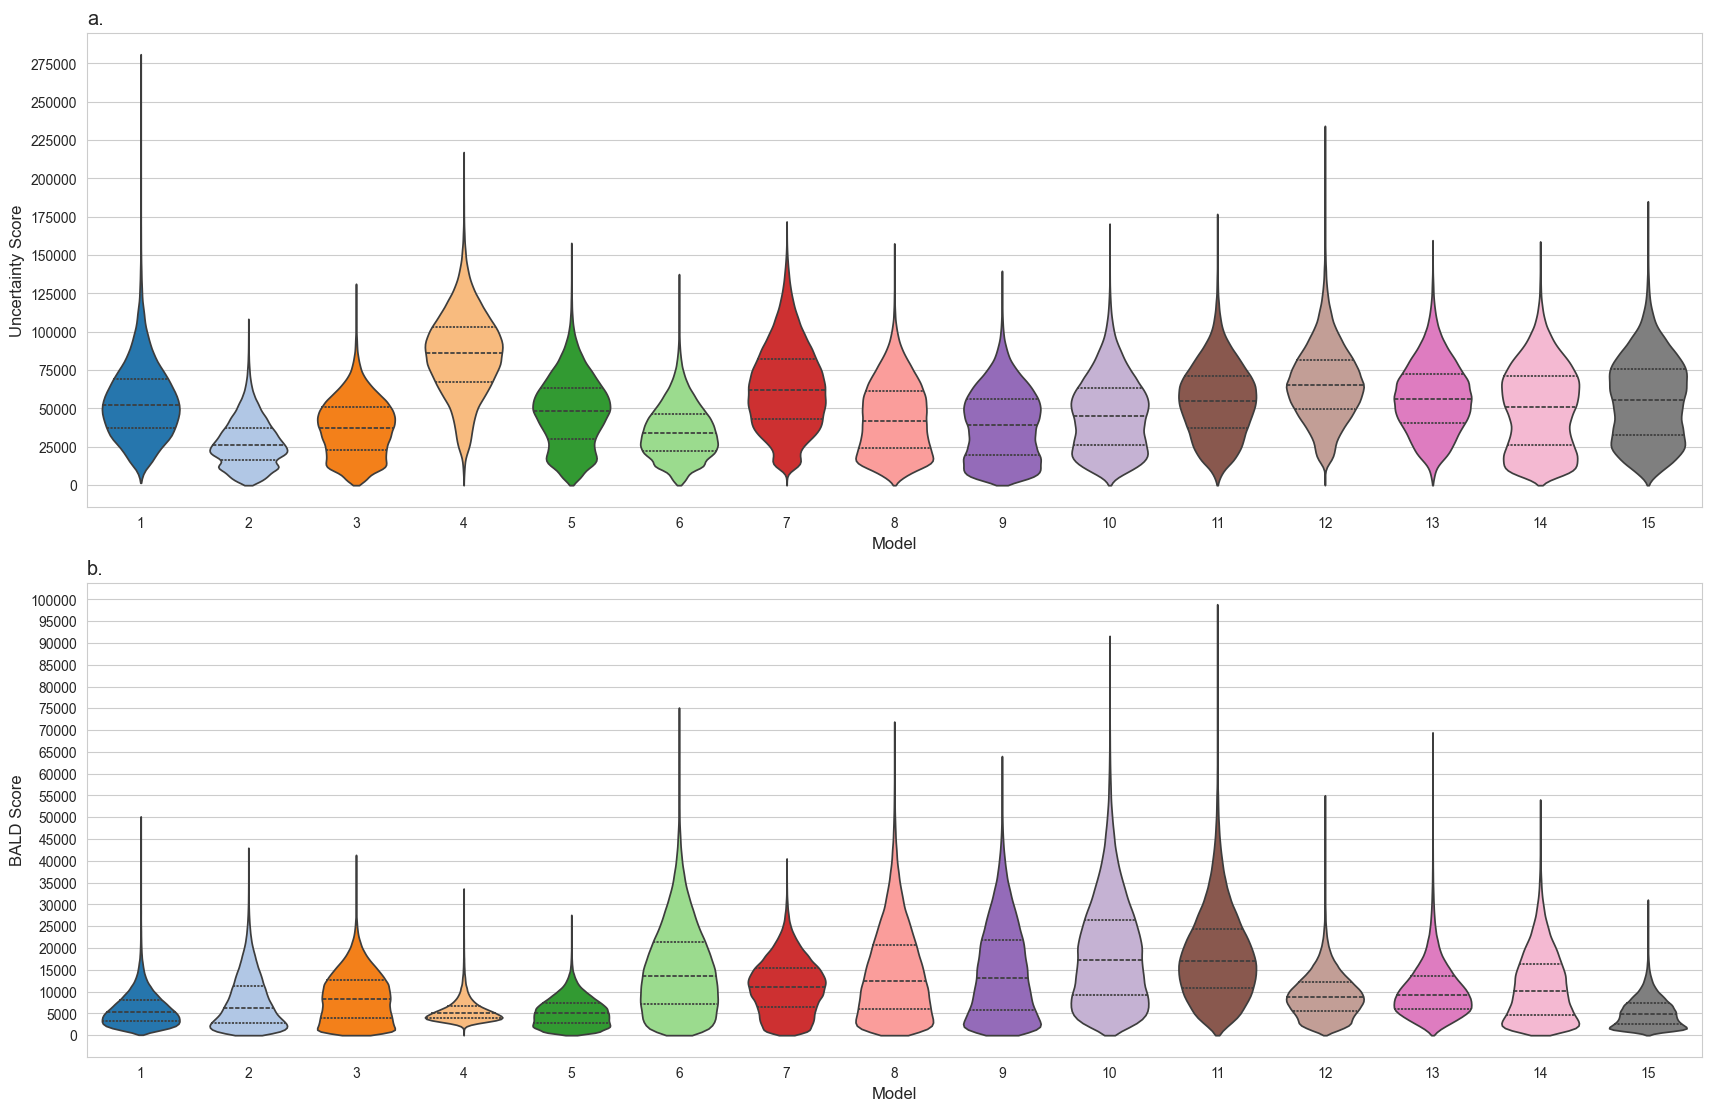

In [23]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(17, 11), layout="constrained",gridspec_kw = {'hspace':0, 'wspace':0.1})

sns.violinplot(inference_data, x="model_id", y="entropy",inner="quart", fill = True, ax = ax1, palette=model_colors, orient='x', split=False, 
             gap=0.1, cut =0, saturation = 0.9)
#ax1.set_title('a. Uncertainty distributions during MC sampling of the unlabeled data pool', x=0, ha = 'left', fontsize= 'x-large')
ax1.set_title('a.', x=0, ha = 'left', fontsize= 'x-large')
ax1.set_xlabel('Model', fontsize= 'large')
ax1.set_ylabel('Uncertainty Score', fontsize= 'large')
ax1.set_yticks(np.arange(0, 300000, 25000))

sns.violinplot(inference_data, x="model_id", y="bald", inner="quart", fill = True, ax = ax2, palette=model_colors, orient='x', split=False, 
             gap=0.1, cut =0, saturation = 0.9)
#ax2.set_title('b. Disagreement distribution during MC sampling of the unlabeled data pool', x =0 , ha = 'left', fontsize= 'x-large')
ax2.set_title('b.', x =0 , ha = 'left', fontsize= 'x-large')
ax2.set_xlabel('Model', fontsize= 'large')
ax2.set_ylabel('BALD Score' , fontsize= 'large')
ax2.set_yticks(np.arange(0, 105000, 5000))


plt.savefig('score_distributions.svg')

## Figure 5 - Evaluation on Expert Annotations

/var/folders/3f/_vnd99d53wj_7lpt3bxd1kvw0000gn/T/ipykernel_75256/3213963948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(expert_agreement, y='randolphs_kappa', x ='file_id', fill= True, palette ='Spectral', ax = ax1, orient='x', gap=0.1, saturation = 0.9, notch = False)
/var/folders/3f/_vnd99d53wj_7lpt3bxd1kvw0000gn/T/ipykernel_75256/3213963948.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(expert_evaluations, x="model_id", y="dice", fill = True, ax =ax2, palette=model_colors, orient='x', gap=0.1, saturation = 0.9, notch = False)


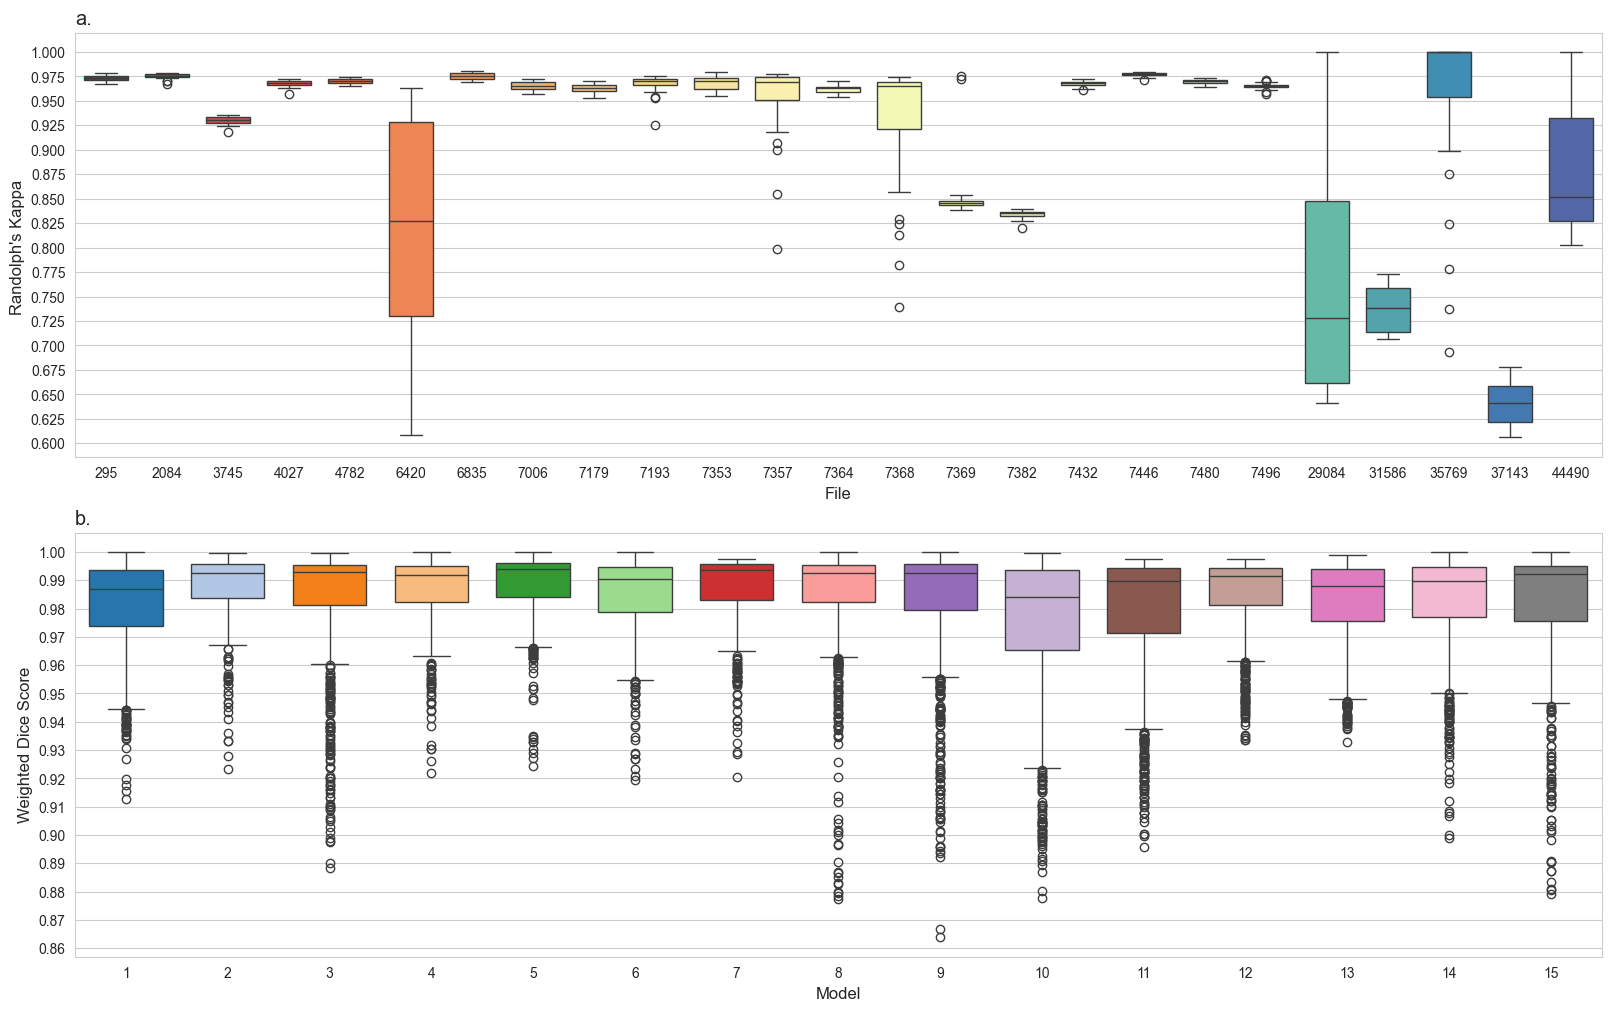

In [24]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10), layout="constrained",gridspec_kw = {'hspace':0, 'wspace':0.1})

sns.boxplot(expert_agreement, y='randolphs_kappa', x ='file_id', fill= True, palette ='Spectral', ax = ax1, orient='x', gap=0.1, saturation = 0.9, notch = False)
ax1.set_title('a.', x=0, ha = 'left', fontsize= 'x-large')
ax1.set_xlabel('File', fontsize= 'large')
ax1.set_ylabel('Randolph\'s Kappa ', fontsize= 'large')
ax1.set_yticks(np.arange(0.60, 1.025, 0.025))

ax2.set_title('b.', x=0, ha = 'left', fontsize= 'x-large')
sns.boxplot(expert_evaluations, x="model_id", y="dice", fill = True, ax =ax2, palette=model_colors, orient='x', gap=0.1, saturation = 0.9, notch = False)
ax2.set_xlabel('Model', fontsize= 'large')
ax2.set_ylabel('Weighted Dice Score', fontsize= 'large')
ax2.set_yticks(np.arange(0.86, 1.0, 0.01))


plt.savefig('expert_annotations.svg')

# Figures - Supplements 

## Figure S1

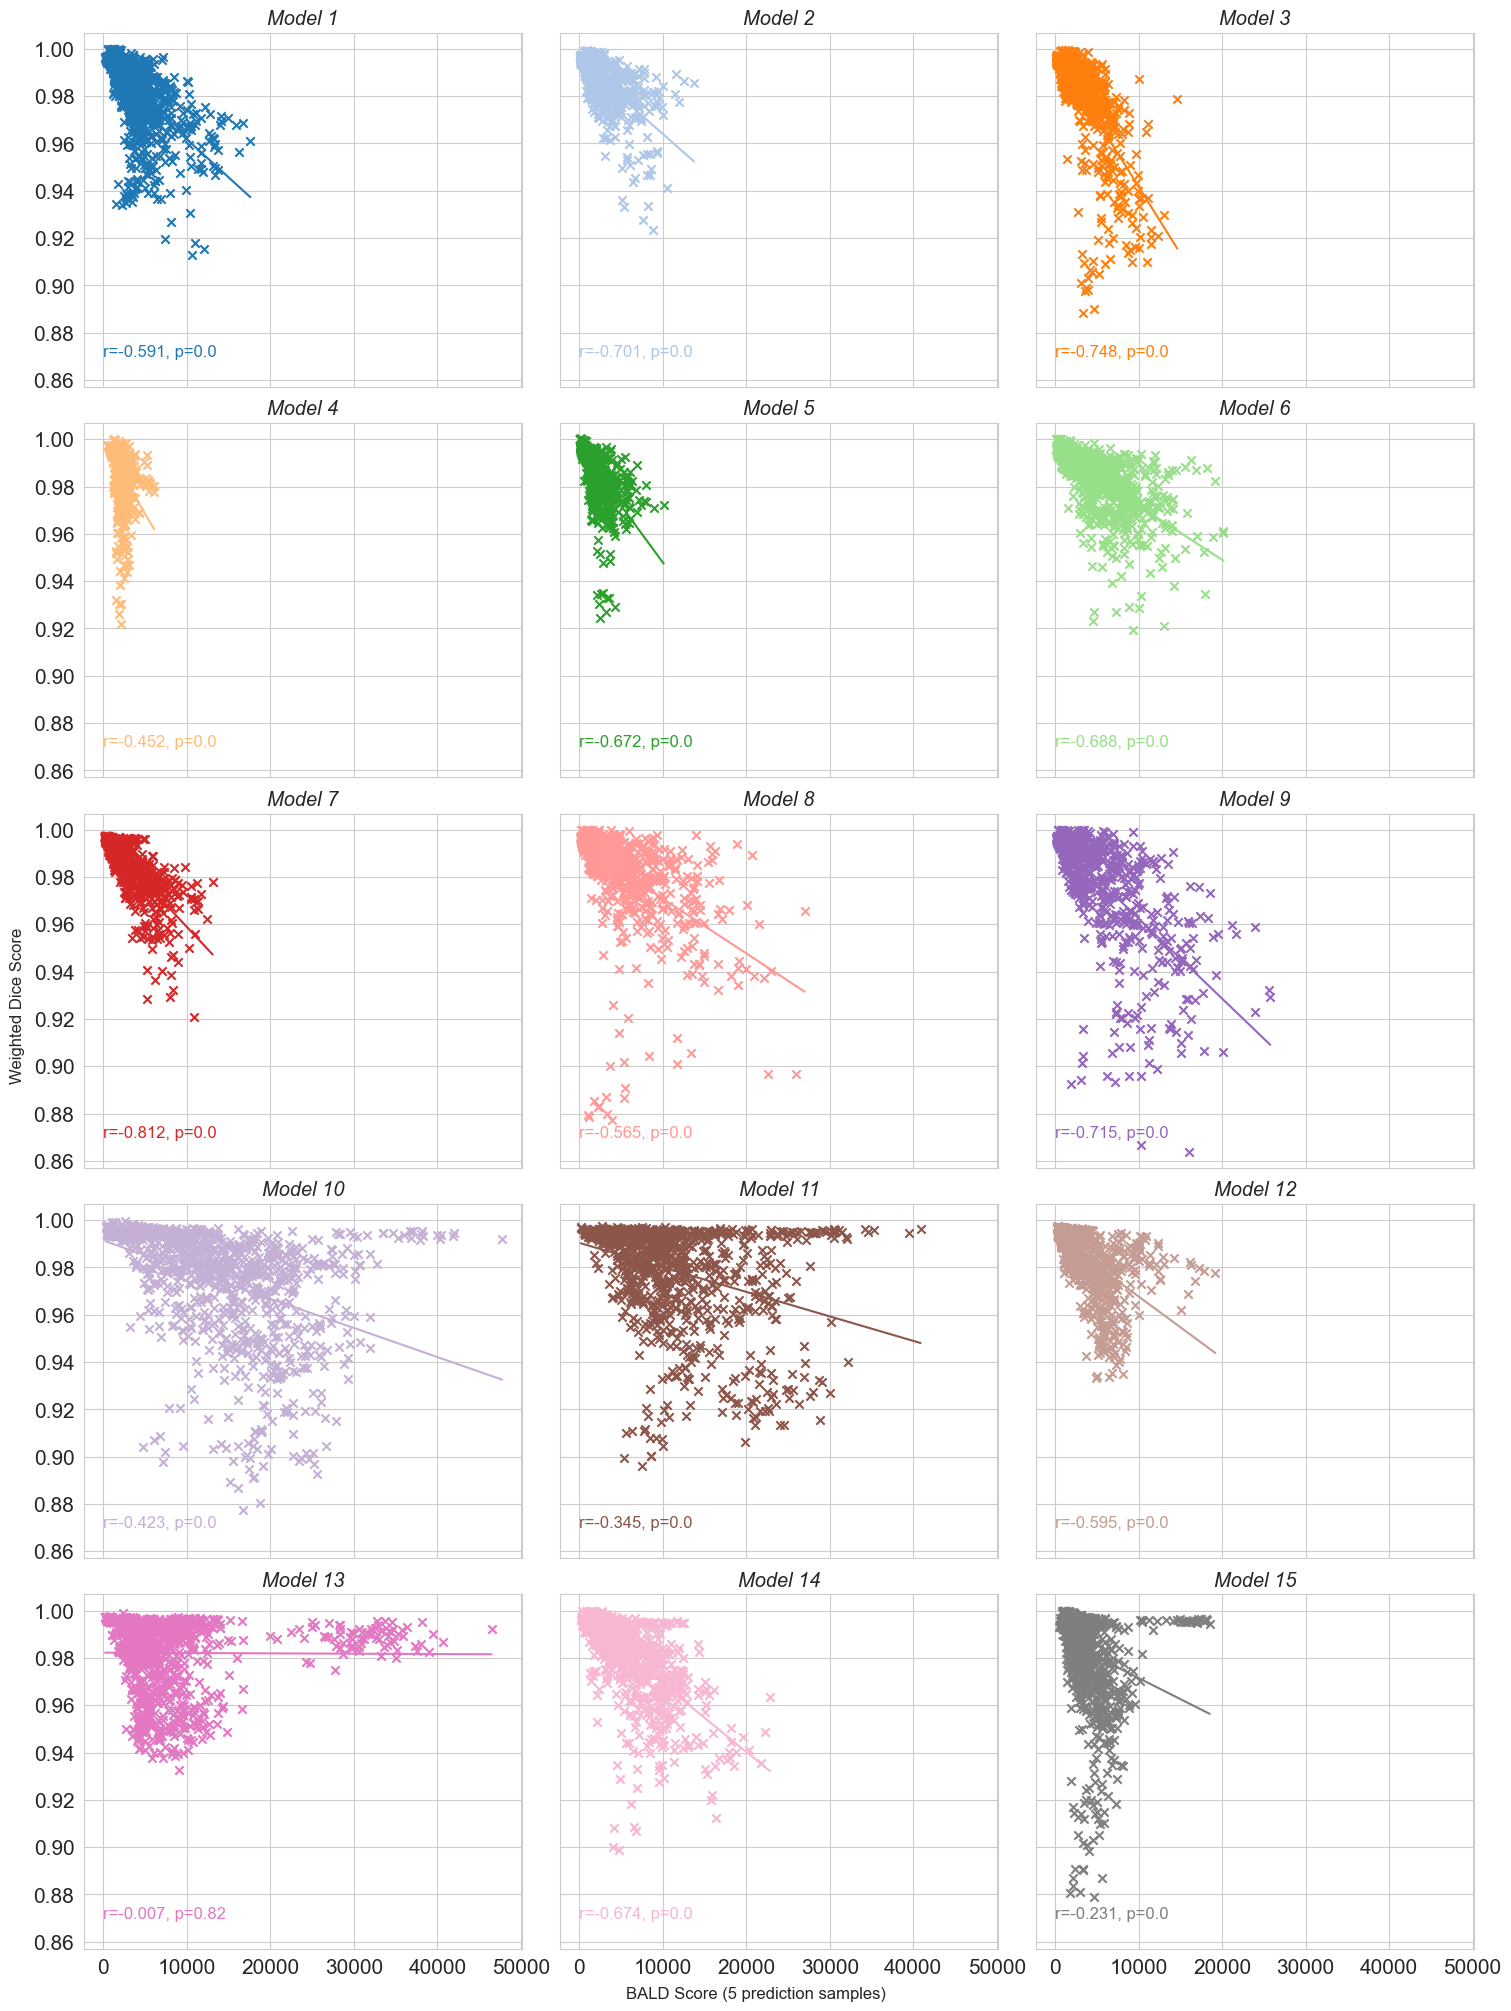

In [25]:
sns.set_style("whitegrid")
figure, axes = plt.subplots(5,3,figsize=(15,20), constrained_layout=True, sharex=True, sharey=True)

counter=1
for i in range(5):
    for j in range(3):
        if counter==16:
            break
        inter_rater_comp_model = expert_evaluations[expert_evaluations['model_id']==counter]
        line_regression = linregress(inter_rater_comp_model['bald'], inter_rater_comp_model['dice'])
        slope = line_regression[0]
        line_c = line_regression[1]
        r_s, p_s = pearsonr(inter_rater_comp_model['bald'], inter_rater_comp_model['dice'])

        axes[i, j].scatter(inter_rater_comp_model['bald'], inter_rater_comp_model['dice'], color = model_colors[counter-1], marker = 'x')
        x = np.linspace(np.min(inter_rater_comp_model['bald'])-0.2, np.max(inter_rater_comp_model['bald'])+0.01, 25)
        
        axes[i,j].plot(x, slope * x + line_c, color = model_colors[counter-1]) 
        
        axes[i,j].set_title('Model ' + str(counter), fontsize='x-large', style='italic' )
        tex_s = r'r=' + str(np.round(r_s,3)) + r', p=' + str(np.round(p_s,3))
        axes[i,j].text(0.45, 0.87, tex_s, fontsize='large', color=model_colors[counter-1])
        axes[i,j].tick_params(labelsize=15)
        counter+=1

figure.supylabel('Weighted Dice Score', fontsize ='large')
figure.supxlabel('BALD Score (5 prediction samples)', fontsize='large')

plt.savefig('correlation_dice_bald.svg')

## Figure S2

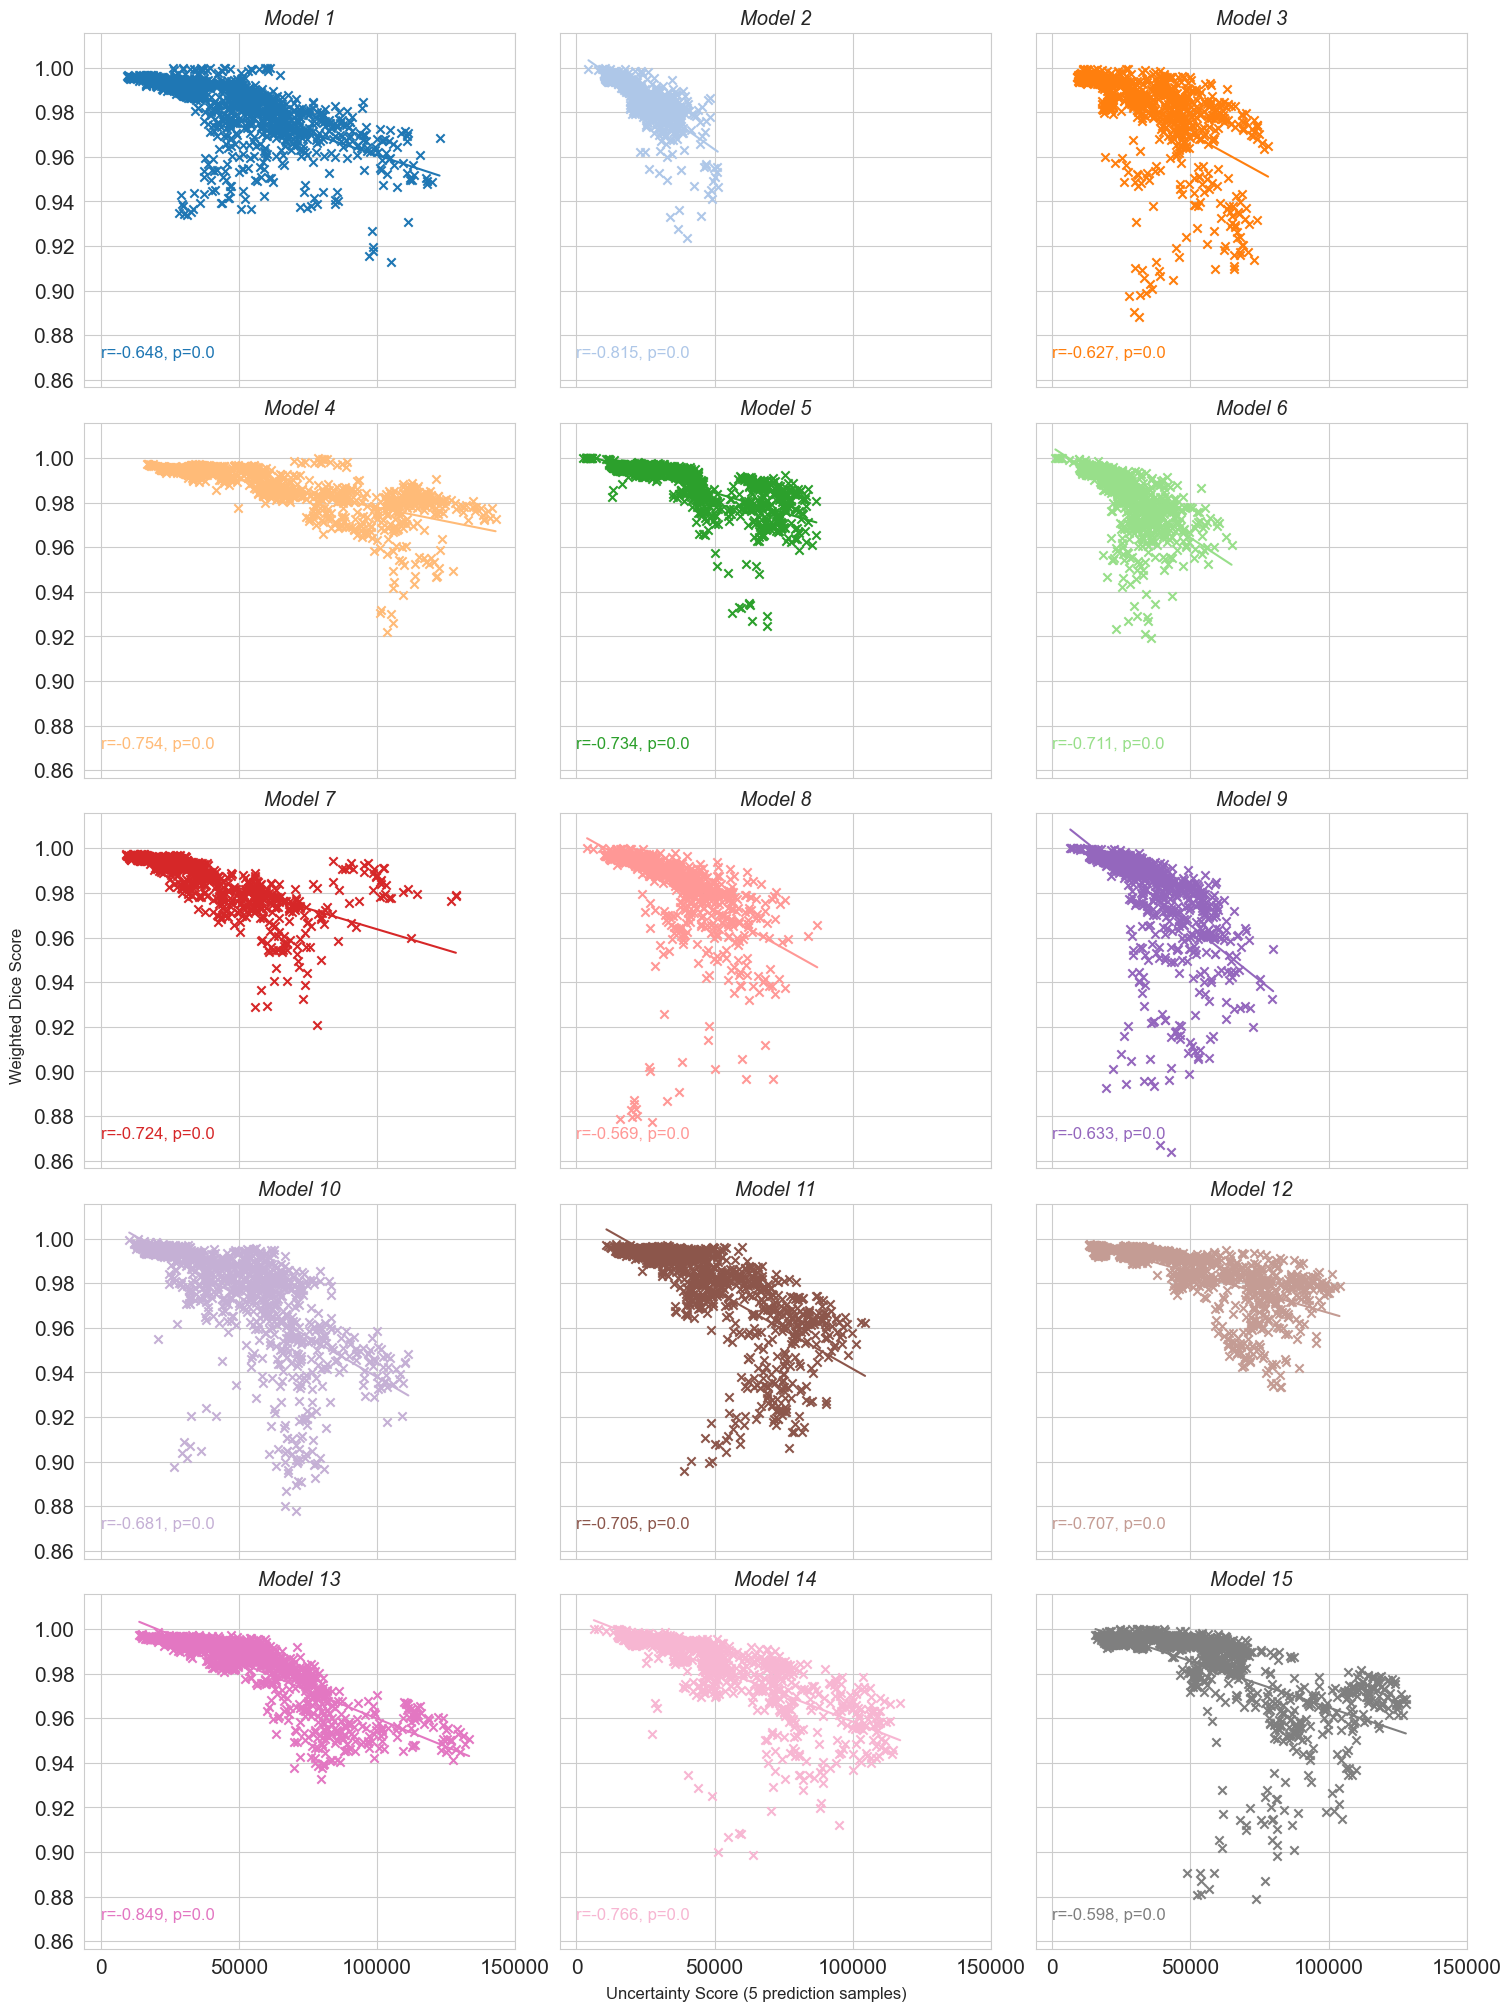

In [26]:
sns.set_style("whitegrid")
figure, axes = plt.subplots(5,3,figsize=(15,20), constrained_layout=True, sharex=True, sharey=True)

counter=1
for i in range(5):
    for j in range(3):
        if counter==16:
            break
        inter_rater_comp_model = expert_evaluations[expert_evaluations['model_id']==counter]
        line_regression = linregress(inter_rater_comp_model['entropy'], inter_rater_comp_model['dice'])
        slope = line_regression[0]
        line_c = line_regression[1]
        r_s, p_s = pearsonr(inter_rater_comp_model['entropy'], inter_rater_comp_model['dice'])

        axes[i, j].scatter(inter_rater_comp_model['entropy'], inter_rater_comp_model['dice'], color = model_colors[counter-1], marker = 'x')
        x = np.linspace(np.min(inter_rater_comp_model['entropy'])-0.2, np.max(inter_rater_comp_model['entropy'])+0.01, 25)
        
        axes[i,j].plot(x, slope * x + line_c, color = model_colors[counter-1]) 
        
        axes[i,j].set_title('Model ' + str(counter), fontsize='x-large', style='italic' )
        tex_s = r'r=' + str(np.round(r_s,3)) + r', p=' + str(np.round(p_s,3))
        axes[i,j].text(0.45, 0.87, tex_s, fontsize='large', color=model_colors[counter-1])
        axes[i,j].tick_params(labelsize=15)
        counter+=1

figure.supylabel('Weighted Dice Score', fontsize ='large')
figure.supxlabel('Uncertainty Score (5 prediction samples)', fontsize='large')

plt.savefig('correlation_dice_uncertainty.svg')